In [1]:

! wget -O matches.html http://lczero.org/matches/


--2019-12-27 22:01:58--  http://lczero.org/matches/
Resolviendo lczero.org (lczero.org)... 104.24.114.1, 104.24.115.1
Conectando con lczero.org (lczero.org)[104.24.114.1]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado [text/html]
Grabando a: “matches.html”

matches.html            [  <=>               ]  10,65M  33,5MB/s    en 0,3s    

2019-12-27 22:01:58 (33,5 MB/s) - “matches.html” guardado [11168938]



In [2]:
import pandas as pd
df = pd.read_html("matches.html")[0]
df.head()

,Id,Run,Candidate,Current,Pass,Score,Elo Delta,Elo Error Margin,Done,Time
0,33143,1,61678,61688,test,+126 -121 =381,2.8,±17.0,True,2019-12-27 20:35:21 +00:00
1,33142,1,61685,61688,test,+110 -117 =395,-3.9,±16.5,True,2019-12-27 20:35:21 +00:00
2,33141,1,61689,61688,true,+133 -121 =367,6.7,±17.5,True,2019-12-27 20:35:21 +00:00
3,33140,2,59284,59294,test,+163 -201 =245,-21.7,±21.3,True,2019-12-27 19:17:49 +00:00
4,33139,2,59291,59294,test,+176 -174 =250,1.2,±21.2,True,2019-12-27 19:17:49 +00:00


In [3]:
# Clean
df = df[df['Run'].values == 1]
# Select last run
df = df[df['Candidate'].values > 60000]

COLUMNS_TO_DROP = ('Done', 'Run',  )
for column in COLUMNS_TO_DROP : df.drop(column, axis=1, inplace=True) 



In [4]:
df

,Id,Candidate,Current,Pass,Score,Elo Delta,Elo Error Margin,Time
0,33143,61678,61688,test,+126 -121 =381,2.8,±17.0,2019-12-27 20:35:21 +00:00
1,33142,61685,61688,test,+110 -117 =395,-3.9,±16.5,2019-12-27 20:35:21 +00:00
2,33141,61689,61688,true,+133 -121 =367,6.7,±17.5,2019-12-27 20:35:21 +00:00
6,33137,61677,61687,test,+141 -118 =369,12.7,±17.4,2019-12-27 18:58:05 +00:00
7,33136,61684,61687,test,+126 -119 =379,3.9,±17.1,2019-12-27 18:58:05 +00:00
8,33135,61688,61687,true,+103 -114 =406,-6.1,±16.1,2019-12-27 18:58:05 +00:00
9,33134,61676,61686,test,+120 -142 =367,-12.2,±17.5,2019-12-27 17:20:14 +00:00
10,33133,61683,61686,test,+115 -126 =384,-6.1,±16.9,2019-12-27 17:20:14 +00:00
11,33132,61687,61686,true,+121 -152 =349,-17.3,±18.1,2019-12-27 17:20:14 +00:00
15,33128,61675,61685,test,+124 -131 =374,-3.9,±17.3,2019-12-27 15:42:14 +00:00


In [5]:
df['networks_distance'] = df['Current'] - df['Candidate'] 
df['networks_distance'].value_counts().to_dict()


{-3: 1, -2: 7, -1: 1680, 3: 1685, 10: 1678, 30: 109, 100: 63, 300: 18}

In [6]:
df = df[df['networks_distance'].values == 100]

In [7]:
import numpy as np
import matplotlib.pyplot as plt


df['Elo Gain'] = df['Elo Delta'] * -1 

df.sort_values("Id", inplace=True, ascending=True)
df

/Users/jaimevalero/miniconda3/envs/flask/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/jaimevalero/miniconda3/envs/flask/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Id,Candidate,Current,Pass,Score,Elo Delta,Elo Error Margin,Time,networks_distance,Elo Gain
9353,23790,60025,60125,test,+0 -3001 =45,-851.3,±52.2,2019-08-05 00:30:09 +00:00,100,851.3
9207,23936,60050,60150,test,+57 -2842 =145,-540.9,±25.9,2019-08-06 15:24:07 +00:00,100,540.9
9034,24109,60075,60175,test,+169 -2487 =387,-347.6,±15.9,2019-08-08 13:01:11 +00:00,100,347.6
8846,24297,60100,60200,test,+324 -2090 =619,-231.3,±12.6,2019-08-10 12:34:57 +00:00,100,231.3
8707,24436,60125,60225,test,+480 -1683 =887,-144.9,±10.9,2019-08-12 09:25:41 +00:00,100,144.9
8592,24551,60150,60250,test,+608 -1454 =988,-99.0,±10.3,2019-08-13 22:15:48 +00:00,100,99.0
8479,24664,60175,60275,test,+633 -1362 =1050,-84.8,±10.1,2019-08-15 19:16:35 +00:00,100,84.8
8394,24749,60200,60300,test,+650 -1220 =1178,-65.7,±9.7,2019-08-17 13:56:23 +00:00,100,65.7
8300,24843,60225,60325,test,+679 -1177 =1181,-57.5,±9.7,2019-08-19 14:14:39 +00:00,100,57.5
8166,24977,60250,60350,test,+725 -1133 =1173,-47.1,±9.7,2019-08-22 02:01:13 +00:00,100,47.1


<module 'matplotlib.pyplot' from '/Users/jaimevalero/miniconda3/envs/flask/lib/python3.6/site-packages/matplotlib/pyplot.py'>

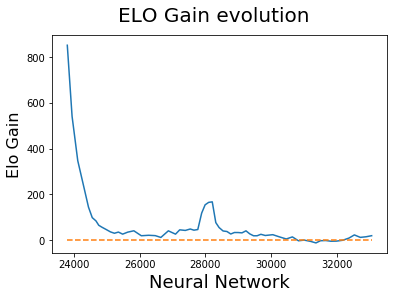

In [19]:
#plt.plot(df.Id, df['Elo Gain'])

from matplotlib import pyplot as plt    

fig = plt.figure()
plt.plot(df.Id, df['Elo Gain'])
fig.suptitle('ELO Gain evolution', fontsize=20)
plt.xlabel('Neural Network', fontsize=18)
plt.ylabel('Elo Gain', fontsize=16)

plt.plot((df.Id.min(), df.Id.max()), (0, 0), '--') 
plt




<module 'matplotlib.pyplot' from '/Users/jaimevalero/miniconda3/envs/flask/lib/python3.6/site-packages/matplotlib/pyplot.py'>

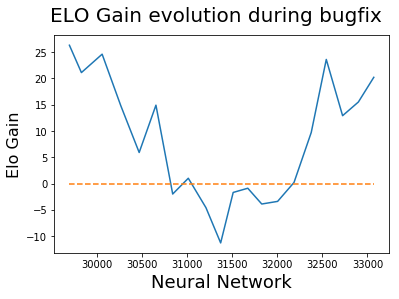

In [24]:
from matplotlib import pyplot as plt    

LAST_ELEMENTS=20
fig = plt.figure()
plt.plot(df.Id.tail(LAST_ELEMENTS), df['Elo Gain'].tail(LAST_ELEMENTS))
fig.suptitle('ELO Gain evolution during bugfix', fontsize=20)
plt.xlabel('Neural Network', fontsize=18)
plt.ylabel('Elo Gain', fontsize=16)

plt.plot((df.Id.tail(LAST_ELEMENTS).min(), df.Id.tail(LAST_ELEMENTS).max()), (0, 0), '--') 
plt
